# COSC 74: Machine Learning

## Homework 3

### Student Name: Amittai Wekesa

Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. Please remember to always use the np library for mathematical functions (e.g., np.log, np.exp, np.sum, etc)

In [89]:
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
%matplotlib inline

Q1) [5 points] Implement the sigmod funcation discussed in class. The function takes a value, x, as input and returns the sigmoid function applied to the value.

In [90]:
def sigmoid(x):
    """
    Sigmoid function.

    Inputs:
    ------
        `x`: input data.

    Outputs:
    -------
        `y`: sigmoid of `x`. 

    Notes:
    ------
    We calculate the sigmoid per the following function:
        `f(x) = 1 / (1 + e^(-x))`

    """
    y = 1/(1+np.exp(-x))
    return y

Q2) [20 points] Implement the logistic regression model and the cross entropy cost discussed in class. Note that the logistic regression model relies on the sigmoid function (which you have implemented above) and the linear  model (which you have implemented in HW2). You can use the linear model from HW2 for this problem. Similar to the least-squares cost from HW2, the cross entropy cost takes in as input an array of weights, w, an array of x's and an array of ys and return a float indicating the total cost.

In [91]:
def model(x, w):
    """
    Model function for linear regression.

    Inputs:
    ------
        `x`: input data
        `w`: weights &mdash; w = [intercept, slope]

    Outputs:
    -------
        `y_predicted`: output predictions
    """
    y_predicted = w[0] + w[1] * x
    return y_predicted

def cross_entropy(w,x,y):
    """
    Cross entropy cost function.
    
    Inputs
    ------
        `w`: weights &mdash; w = [intercept, slope]
        `x`: input data
        `y`: correct labels

    Outputs
    -------
        `cost`: Computed cost value
    """

    epsilon     = 1e-15               # to avoid log(0)
    xTw         = model(x, w)
    sigmoid_x   = sigmoid(xTw)
    cost_1      = -y * np.log(epsilon + sigmoid_x)
    cost_0      = (1 - y) * np.log(epsilon + 1 - sigmoid_x)
    _cost       = cost_1 - cost_0
    cost        = np.mean(_cost)
    return cost

Q3) [2 points] Run the code below to read a data file. Plot a scatter plot of x vs y.

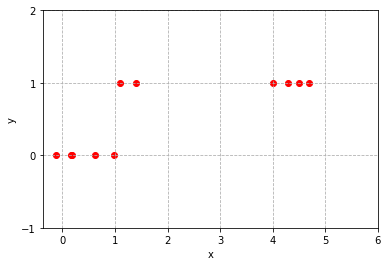

In [92]:
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname, delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

plt.scatter(x, y, color='red')
plt.grid(linestyle="--")
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(range(0, 7))
plt.yticks([-1, 0, 1, 2])
plt.show()

Q4) [10 points] Move the gradient descent function from HW2. Run the function using the cross_entropy cost and the x and y from above. The parameters should be set to: max_its=2000,w=[3.0,3.0 ], and alpha=1. Save the cost and weight history returned by the gradient descent function. Plot the cost history.


In [93]:
def gradient_descent(g, alpha, max_its, w, x, y):
    """
    Gradient Descent.

    Inputs:
    ------
        `g`: cost function.
        `alpha`: learning rate
        `max_its`: number of iterations
        `w`: initial weight 
        `x`: input data
        `y`: correct tags
    
    Outputs:
    -------
        `weight_history`: lists of weights
        `cost_history`: list of costs corresponding to the weights.
    """
    
    # 0. init
    gradient = grad(g)

    weight_history = [w]
    cost_history = [g(w, x, y)]
    
    # 1. iterate
    for step in range(max_its):

        # 2. step
        w -= alpha * gradient(w, x, y)
        
        # 3. record
        cost_history.append(g(w, x, y))
        weight_history.append(w)
        
    return weight_history, cost_history


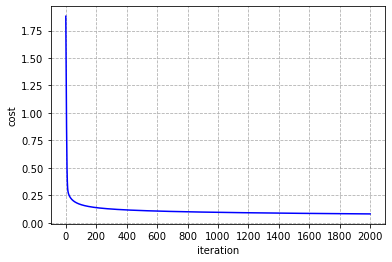

In [94]:
max_its = 2000
w       = np.array([3.0, 3.0])
alpha   = 1

weights, costs = gradient_descent(cross_entropy, alpha, max_its, w, x, y)
steps = np.arange(max_its + 1)

plt.plot(steps, costs, color='blue')
plt.grid(linestyle="--")
plt.xlabel('iteration')
plt.ylabel('cost')
plt.xticks(range(0, max_its + 2, 200))
plt.yticks(np.arange(0, 2, 0.25))
plt.show()


Q5) [10 points] Implement a logistic regression classifier that takes in the learned weights and x as input and returns the probability of the positive class (note that this is just the output of the sigmoid applied to the linear combination of the x and w)

In [95]:
def logistic_regression(learned_w,x):
    """
    Logistic regression.

    Inputs:
    ------
        `learned_w`: weights &mdash; learned_w = [intercept, slope]
        `x`: input data

    Outputs:
    -------
        `positive_class_prob`: distribution probabilities (0 <= x <= 1)
            of the point being the positive class (1)
    """
    
    positive_class_prob = sigmoid(model(x, learned_w))
    return positive_class_prob

Q6) [5 points] Use the learned weights from the last gradient descent run and the logistic regression function implemented above to plot the learned curve. You can use the linspace method (shown below) to generate a list of xs that you can use. You need to generate a y for each of the candidate xs using the logistic regression function and the learned weights. On the same figure, also plot the scatter plot from Q3. 


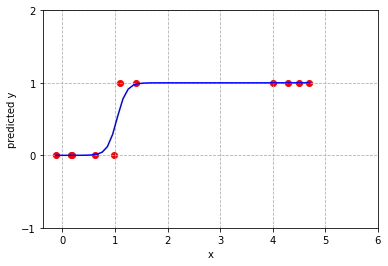

In [96]:
s = np.linspace(np.min(x),np.max(x))
learned_weights = weights[-1]
ys = logistic_regression(learned_weights, s)

plt.scatter(x, y, color='red')
plt.plot(s, ys, color='blue')
plt.grid(linestyle="--")
plt.xlabel("x")
plt.ylabel("predicted y")
plt.xticks(range(0, 7))
plt.yticks([-1, 0, 1, 2])
plt.show()

Q7) [5 points] Slightly modify the logistic regression model above so that it returns a 1 or 0 based on the specified threshold.

In [97]:
def logistic_regression_modified(learned_w, x, threshold):
    """
    Logistic regression &mdash; discretized to either produce 0 or 1
    depending on a specifided threshold.

    Inputs:
    ------
        `learned_w`: weights &mdash; learned_w = [intercept, slope]
        `x`: input data
        `threshold`: threshold value

    Outputs:
    -------
        `class_label`: the predicted class, either 0 or 1
    """

    prediction = logistic_regression(learned_w, x)
    class_label: int = np.round(prediction - threshold + 0.5)
    return class_label

Q8) [15 points] Write a function (called evaluate) that takes in actual and predicted ys (for a binary classification problem) and return a confusion matrix and the accuracy. Use the modified logistic regression model and the evaluate function below to report the confusion matrix and accuracy for the x and y used for our training at a threshold of 0.5.  

In [98]:
def evaluate(y_actual,y_pred):
    """
    Evaluate the performance of the model.

    Inputs:
    ------
        `y_actual`: actual labels
        `y_pred`: predicted labels
        
    Outputs:
    -------
        `false_positives`: number of false positives
        `false_negatives`: number of false negatives
        `true_positives`: number of true positives
        `true_negatives`: number of true negatives
        `accuracy`: the percentage of predictions that were correct, 0 <= accuracy <= 1

    """

    false_positive  = 0
    false_negative  = 0
    true_positive   = 0
    true_negative   = 0
    correct         = 0

    for (actual, predicted) in zip(y_actual[0], y_pred[0]):
        if actual == predicted:
            correct += 1

            if actual == 1:
                true_positive += 1
            else:
                true_negative += 1
    
        elif actual == 1:
            false_negative += 1
        else:
            false_positive += 1
    
    accuracy = correct / len(y_actual[0])

    return false_positive, false_negative, true_positive, true_negative, accuracy

predictions = logistic_regression_modified(learned_weights, x, 0.5)
false_positive, false_negative, true_positive, true_negative, accuracy = evaluate(y, predictions)

print(f"{false_positive = }")
print(f"{false_negative = }")
print(f"{true_positive = }")
print(f"{true_negative = }")
print(f"{accuracy = }")

false_positive = 0
false_negative = 0
true_positive = 6
true_negative = 5
accuracy = 1.0


Q9) [20 points] Implement the perceptron cost function from the class (the softmax version). Note that the perceptron cost also uses the linear model (the model function from question 2).

In [99]:
def perceptron_cost(w, x, y):
   """
   Perceptron cost function.

   Inputs:
   ------
      `w`: weights &mdash; w = [intercept, slope]
      `x`: input data
      `y`: correct tags
      
   Outputs:
   -------
      `cost`: computed softmax cost.
   """

   xTw = model(x, w)

   soft_s = np.log(1 + np.exp(-y * xTw))

   cost = np.mean(soft_s)
   
   return cost

Q10) [10 points] Run gradient descent function using the perceptron cost and the x and y from above and the parameters set to: max_its=2000,w=[1.0,1.0], and alpha=1.0. Save the cost and weight history returned by the gradient descent function. Plot the cost history. Which cost seems to do better on this dataset? Why do think that is?


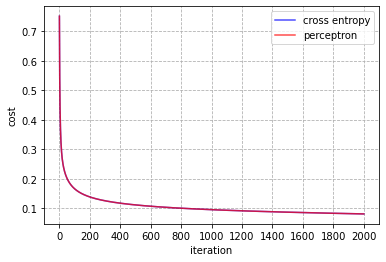

In [100]:
max_its = 2000
w       = np.array([1.0, 1.0])
alpha   = 1.0

# create copy of ys for perceptron, replace 0 with -1
y_2 = y.copy()
y_2[y_2 == 0] = -1


weights_cross_entropy, costs_cross_entropy = gradient_descent(cross_entropy, alpha, max_its, np.array([1.0, 1.0]), x, y)
weights_perceptron, costs_perceptron = gradient_descent(perceptron_cost, alpha, max_its, np.array([1.0, 1.0]), x, y_2)
steps = np.arange(max_its + 1)

plt.plot(steps, costs_cross_entropy, color='blue', label='cross entropy', alpha=0.7)
plt.plot(steps, costs_perceptron, color='red', label='perceptron', alpha=0.7)
plt.grid(linestyle="--")
plt.xlabel('iteration')
plt.ylabel('cost')
plt.xticks(range(0, max_its + 2, 200))
plt.legend()
plt.show()



I (suspiciously) got the identical performance with the perceptron cost as with cross entropy cost when I set both runs to use the same starting weights.

I think this is justified, since the tanh function is just a shifted version of the sigmoid function.

---

## The rest of these problems are for bonus points

Q11) [2 points]  The file 'heart.csv' has 304 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [101]:
import pandas as pd
csvname = 'heart.csv'
dataframe = pd.read_csv(csvname, delimiter = ',')
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Q12) [2 points] Use the data above to set y to be the "target" and X to be the remaining columns.

In [102]:
x = dataframe.drop("target", axis=1)
y = dataframe["target"]
print(x.head())
print(y.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


Q13) [2 points] Run the code below to import the logistic regression and the train_test split functions from sklearn. Split your data into 80% train 20% test.

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("X train")
print(X_train.head())
print("y train")
print(y_train.head())
print("x test")
print(X_test.head())
print("y test")
print(y_test.head())

X train
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
74    43    0   2       122   213    0        1      165      0      0.2   
153   66    0   2       146   278    0        0      152      0      0.0   
64    58    1   2       140   211    1        0      165      0      0.0   
296   63    0   0       124   197    0        1      136      1      0.0   
287   57    1   1       154   232    0        0      164      0      0.0   

     slope  ca  thal  
74       1   0     2  
153      1   1     2  
64       2   0     2  
296      1   0     2  
287      2   1     2  
y train
74     1
153    1
64     1
296    0
287    0
Name: target, dtype: int64
x test
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
225   70    1   0       145   174    0        1      125      1      2.6   
152   64    1   3       170   227    0        0      155      0      0.6   
228   59    1   3       170   288    0        0      159      0      0.2   
201   

Q14) [5 points] Use sklearn to fit a logistic regression model on your training set. Use all the default parameter. Do not evaluate at this point. (You can find out about sklearn logistic regression here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [112]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

Q15) [5 points] Use the .predict_proba function of the logistic regression model that you have learned on your X_test. Note that the .predict_proba function returns an array of tuples where each element corresponds to the predicted probability for class 0 and 1 of the data point.

In [120]:
predictions = model.predict_proba(X_test)
# print(type(predictions))
# print(predictions.shape)
print(predictions)


[[0.95653143 0.04346857]
 [0.2012099  0.7987901 ]
 [0.18789902 0.81210098]
 [0.97680918 0.02319082]
 [0.8981166  0.1018834 ]
 [0.53840472 0.46159528]
 [0.91759944 0.08240056]
 [0.88163044 0.11836956]
 [0.99517745 0.00482255]
 [0.9963012  0.0036988 ]
 [0.24084346 0.75915654]
 [0.06664967 0.93335033]
 [0.96514038 0.03485962]
 [0.15739838 0.84260162]
 [0.03670801 0.96329199]
 [0.2868466  0.7131534 ]
 [0.92713893 0.07286107]
 [0.27613696 0.72386304]
 [0.99203218 0.00796782]
 [0.15202987 0.84797013]
 [0.18005283 0.81994717]
 [0.65234629 0.34765371]
 [0.90642826 0.09357174]
 [0.85953742 0.14046258]
 [0.11952041 0.88047959]
 [0.46000158 0.53999842]
 [0.81758619 0.18241381]
 [0.61903428 0.38096572]
 [0.02040678 0.97959322]
 [0.34753823 0.65246177]
 [0.36971027 0.63028973]
 [0.98309235 0.01690765]
 [0.03482673 0.96517327]
 [0.26089137 0.73910863]
 [0.07176474 0.92823526]
 [0.34173925 0.65826075]
 [0.96422061 0.03577939]
 [0.15622893 0.84377107]
 [0.9111741  0.0888259 ]
 [0.86458061 0.13541939]


Q16) [2 points] Filter the predicted probabilties from the last question to an array containing only the probabilites for class 1. I.e., you should no longer have tuples.

In [121]:
predictions = predictions[:, 1]
print(predictions)

[0.04346857 0.7987901  0.81210098 0.02319082 0.1018834  0.46159528
 0.08240056 0.11836956 0.00482255 0.0036988  0.75915654 0.93335033
 0.03485962 0.84260162 0.96329199 0.7131534  0.07286107 0.72386304
 0.00796782 0.84797013 0.81994717 0.34765371 0.09357174 0.14046258
 0.88047959 0.53999842 0.18241381 0.38096572 0.97959322 0.65246177
 0.63028973 0.01690765 0.96517327 0.73910863 0.92823526 0.65826075
 0.03577939 0.84377107 0.0888259  0.13541939 0.76582203 0.79670401
 0.35435621 0.08370503 0.51312985 0.70608772 0.8153276  0.62829454
 0.04649134 0.81839449 0.85487067 0.59936129 0.97246265 0.8680463
 0.9948843  0.13415748 0.94757816 0.92692823 0.76428883 0.95104851
 0.7613463 ]


Q17) [8 points] Use the roc_curve function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to plot the ROC curve for your predictions using the predicted probabilities for class 1 and your y_test (use the default parameters). Also, print out the thresholds generated by the roc_curve function.

thresholds = array([1.9948843 , 0.9948843 , 0.92823526, 0.92692823, 0.8153276 ,
       0.81210098, 0.70608772, 0.65826075, 0.65246177, 0.62829454,
       0.59936129, 0.53999842, 0.51312985, 0.38096572, 0.35435621,
       0.11836956, 0.1018834 , 0.08240056, 0.07286107, 0.0036988 ])


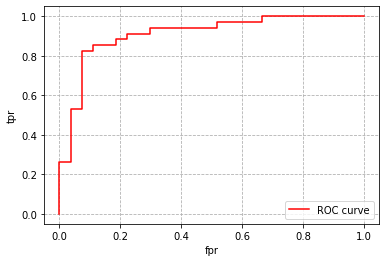

In [124]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predictions)
print(f"{thresholds = }")

plt.plot(fpr, tpr, color='red', label='ROC curve')
plt.grid(linestyle="--")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc="lower right")
plt.show()

Q18) [2 points] Use the roc_auc_score function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to report the AUC score using the exact same setup as the last question.

In [125]:
from sklearn.metrics import roc_auc_score

AUC = roc_auc_score(y_test, predictions)
print(f"{AUC = }")


AUC = 0.9095860566448801
